In [21]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

import numpy as np
print(tf.__version__)
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


1.13.1


In [22]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [23]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [24]:
word_index = imdb.get_word_index()
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] =1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text ])


In [25]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=256)

In [26]:
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=256)

In [27]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [28]:
len(train_data[0])

256

In [40]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))

In [41]:
model.add(keras.layers.GlobalAveragePooling1D())

In [42]:
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])

In [45]:
x_val = train_data[: 10000]
partial_x_train = train_data[10000:]
y_val = train_labels[: 10000]
partial_y_train = train_labels[10000:]


In [46]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 81us/sample - loss: 0.6926 - acc: 0.5029 - val_loss: 0.6918 - val_acc: 0.4976
Epoch 2/40
15000/15000 [==============================] - 1s 48us/sample - loss: 0.6895 - acc: 0.5321 - val_loss: 0.6870 - val_acc: 0.5806
Epoch 3/40
15000/15000 [==============================] - 1s 48us/sample - loss: 0.6811 - acc: 0.7054 - val_loss: 0.6760 - val_acc: 0.7213
Epoch 4/40
15000/15000 [==============================] - 1s 55us/sample - loss: 0.6651 - acc: 0.7574 - val_loss: 0.6567 - val_acc: 0.7567
Epoch 5/40
15000/15000 [==============================] - 1s 49us/sample - loss: 0.6393 - acc: 0.7821 - val_loss: 0.6283 - val_acc: 0.7744
Epoch 6/40
15000/15000 [==============================] - 1s 48us/sample - loss: 0.6039 - acc: 0.7967 - val_loss: 0.5923 - val_acc: 0.7874
Epoch 7/40
15000/15000 [==============================] - 1s 48us/sample - loss: 0.5620 - acc: 0.8161 - val_loss: 0.

In [47]:
results = model.evaluate(test_data, test_labels)

25000/25000 [==============================] - 1s 32us/sample - loss: 0.3184 - acc: 0.8736


In [48]:
print(results)

[0.31840839634895324, 0.87364]


In [49]:
history_dict = history.history
history_dict.keys()


dict_keys(['val_acc', 'acc', 'val_loss', 'loss'])

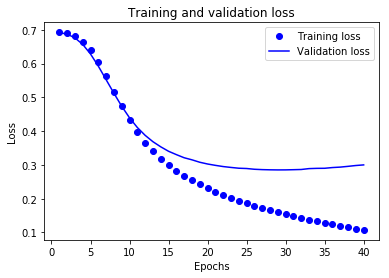

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


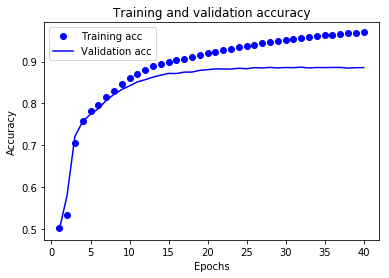

In [51]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
